<a href="https://colab.research.google.com/github/leedongkt/computervision/blob/main/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%848%EC%A3%BC%EC%B0%A8%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1 실습

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
170498071/170498071 [==============================] - 5s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


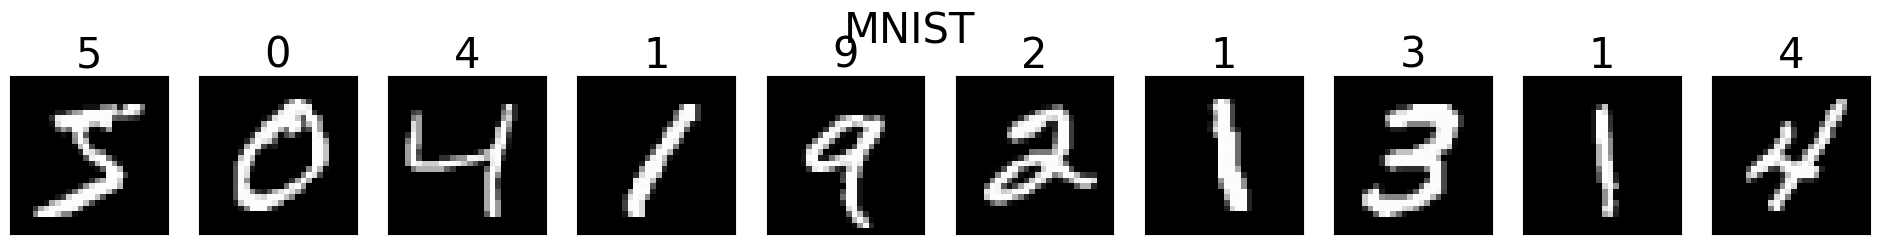

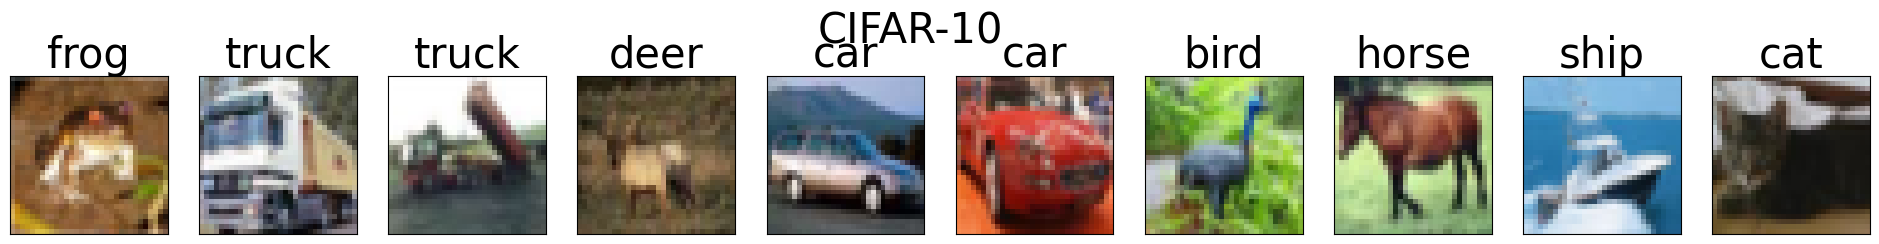

In [ ]:
# 실습1
import tensorflow as tf
import tensorflow.keras.datasets as ds
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# MNIST 데이터셋 시각화
plt.figure(figsize=(24,3))
plt.suptitle('MNIST', fontsize=30)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title(str(y_train[i]), fontsize=30)

# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# CIFAR-10 데이터셋 시각화
plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10', fontsize=30)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[y_train[i,0]], fontsize=30)


In [ ]:
# 실습2
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)  # 이미지 데이터를 784차원 벡터로 변환
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0  # 데이터를 정규화
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 레이블을 원-핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 모델 구성 및 컴파일
model = Sequential()
model.add(Dense(units=512, activation='tanh', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

# 모델 평가 및 결과 출력
results = model.evaluate(x_test, y_test, verbose=0)
print('정확도:', results[1] * 100)


Epoch 1/50
469/469 - 4s - loss: 0.0907 - accuracy: 0.1440 - val_loss: 0.0876 - val_accuracy: 0.2316 - 4s/epoch - 8ms/step
Epoch 2/50
469/469 - 4s - loss: 0.0838 - accuracy: 0.3284 - val_loss: 0.0803 - val_accuracy: 0.4196 - 4s/epoch - 8ms/step
Epoch 3/50
469/469 - 4s - loss: 0.0763 - accuracy: 0.4949 - val_loss: 0.0724 - val_accuracy: 0.5572 - 4s/epoch - 8ms/step
Epoch 4/50
469/469 - 3s - loss: 0.0686 - accuracy: 0.5897 - val_loss: 0.0647 - val_accuracy: 0.6219 - 3s/epoch - 7ms/step
Epoch 5/50
469/469 - 3s - loss: 0.0616 - accuracy: 0.6378 - val_loss: 0.0580 - val_accuracy: 0.6689 - 3s/epoch - 6ms/step
Epoch 6/50
469/469 - 4s - loss: 0.0557 - accuracy: 0.6767 - val_loss: 0.0525 - val_accuracy: 0.7077 - 4s/epoch - 9ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0507 - accuracy: 0.7148 - val_loss: 0.0478 - val_accuracy: 0.7426 - 3s/epoch - 7ms/step
Epoch 8/50
469/469 - 3s - loss: 0.0466 - accuracy: 0.7481 - val_loss: 0.0440 - val_accuracy: 0.7710 - 3s/epoch - 7ms/step
Epoch 9/50
469/469 - 3s 

In [ ]:
# 실습3
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)  # 이미지 데이터를 784차원 벡터로 변환
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0  # 데이터를 정규화
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 레이블을 원-핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 모델 구성 및 컴파일
model = Sequential()
model.add(Dense(units=512, activation='tanh', input_shape=(784,)))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

# 모델 평가 및 결과 출력
results = model.evaluate(x_test, y_test, verbose=0)
print('정확도:', results[1] * 100)


Epoch 1/50
469/469 - 11s - loss: 0.0148 - accuracy: 0.9022 - val_loss: 0.0101 - val_accuracy: 0.9349 - 11s/epoch - 23ms/step
Epoch 2/50
469/469 - 7s - loss: 0.0088 - accuracy: 0.9436 - val_loss: 0.0077 - val_accuracy: 0.9493 - 7s/epoch - 15ms/step
Epoch 3/50
469/469 - 4s - loss: 0.0065 - accuracy: 0.9587 - val_loss: 0.0060 - val_accuracy: 0.9625 - 4s/epoch - 9ms/step
Epoch 4/50
469/469 - 5s - loss: 0.0050 - accuracy: 0.9689 - val_loss: 0.0054 - val_accuracy: 0.9653 - 5s/epoch - 11ms/step
Epoch 5/50
469/469 - 4s - loss: 0.0041 - accuracy: 0.9755 - val_loss: 0.0046 - val_accuracy: 0.9706 - 4s/epoch - 9ms/step
Epoch 6/50
469/469 - 4s - loss: 0.0034 - accuracy: 0.9798 - val_loss: 0.0044 - val_accuracy: 0.9716 - 4s/epoch - 9ms/step
Epoch 7/50
469/469 - 5s - loss: 0.0028 - accuracy: 0.9830 - val_loss: 0.0041 - val_accuracy: 0.9731 - 5s/epoch - 10ms/step
Epoch 8/50
469/469 - 4s - loss: 0.0024 - accuracy: 0.9859 - val_loss: 0.0035 - val_accuracy: 0.9784 - 4s/epoch - 9ms/step
Epoch 9/50
469/469

Epoch 1/50
469/469 - 6s - loss: 0.0878 - accuracy: 0.2083 - val_loss: 0.0851 - val_accuracy: 0.2935 - 6s/epoch - 12ms/step
Epoch 2/50
469/469 - 3s - loss: 0.0817 - accuracy: 0.3764 - val_loss: 0.0782 - val_accuracy: 0.4480 - 3s/epoch - 7ms/step
Epoch 3/50
469/469 - 3s - loss: 0.0746 - accuracy: 0.5038 - val_loss: 0.0708 - val_accuracy: 0.5620 - 3s/epoch - 7ms/step
Epoch 4/50
469/469 - 4s - loss: 0.0675 - accuracy: 0.6041 - val_loss: 0.0637 - val_accuracy: 0.6503 - 4s/epoch - 9ms/step
Epoch 5/50
469/469 - 4s - loss: 0.0608 - accuracy: 0.6701 - val_loss: 0.0572 - val_accuracy: 0.6979 - 4s/epoch - 8ms/step
Epoch 6/50
469/469 - 3s - loss: 0.0549 - accuracy: 0.7071 - val_loss: 0.0518 - val_accuracy: 0.7297 - 3s/epoch - 7ms/step
Epoch 7/50
469/469 - 3s - loss: 0.0501 - accuracy: 0.7333 - val_loss: 0.0473 - val_accuracy: 0.7569 - 3s/epoch - 7ms/step
Epoch 8/50
469/469 - 4s - loss: 0.0461 - accuracy: 0.7591 - val_loss: 0.0435 - val_accuracy: 0.7827 - 4s/epoch - 9ms/step
Epoch 9/50
469/469 - 3s

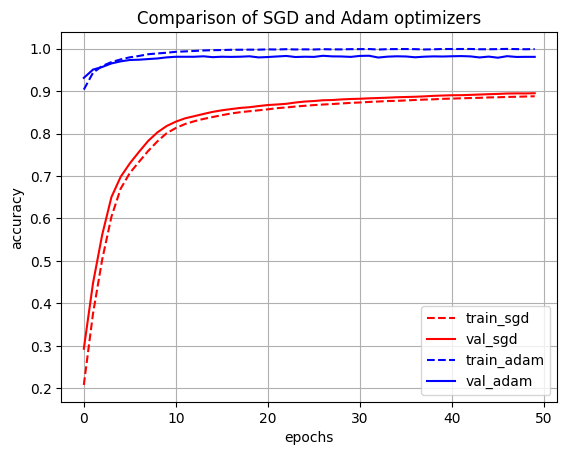

In [ ]:
# 실습4
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# SGD 옵티마이저를 사용한 모델
mlp_sgd = Sequential()
mlp_sgd.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_sgd.add(Dense(units=10, activation='softmax'))
mlp_sgd.compile(loss='MSE', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])
hist_sgd = mlp_sgd.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('SGD 정확도:', mlp_sgd.evaluate(x_test, y_test, verbose=0)[1] * 100)

# Adam 옵티마이저를 사용한 모델
mlp_adam = Sequential()
mlp_adam.add(Dense(units=512, activation='tanh', input_shape=(784,)))
mlp_adam.add(Dense(units=10, activation='softmax'))
mlp_adam.compile(loss='MSE', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist_adam = mlp_adam.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)
print('Adam 정확도:', mlp_adam.evaluate(x_test, y_test, verbose=0)[1] * 100)

# 훈련 및 검증 정확도 비교 그래프
plt.plot(hist_sgd.history['accuracy'], 'r--')
plt.plot(hist_sgd.history['val_accuracy'], 'r')
plt.plot(hist_adam.history['accuracy'], 'b--')
plt.plot(hist_adam.history['val_accuracy'], 'b')
plt.title('Comparison of SGD and Adam optimizers')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'val_sgd', 'train_adam', 'val_adam'])
plt.grid()
plt.show()


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
469/469 - 11s - loss: 0.4027 - accuracy: 0.8956 - val_loss: 0.1653 - val_accuracy: 0.9520 - 11s/epoch - 22ms/step
Epoch 2/50
469/469 - 4s - loss: 0.1413 - accuracy: 0.9593 - val_loss: 0.1170 - val_accuracy: 0.9652 - 4s/epoch - 9ms/step
Epoch 3/50
469/469 - 2s - loss: 0.0958 - accuracy: 0.9719 - val_loss: 0.0972 - val_accuracy: 0.9700 - 2s/epoch - 4ms/step
Epoch 4/50
469/469 - 2s - loss: 0.0698 - accuracy: 0.9796 - val_loss: 0.0774 - val_accuracy: 0.9749 - 2s/epoch - 4ms/step
Epoch 5/50
469/469 - 2s - loss: 0.0528 - accuracy: 0.9849 - val_loss: 0.0775 - val_accuracy: 0.9760 - 2s/epoch - 3ms/step
Epoch 6/50
469/469 - 2s - loss: 0.0405 - accuracy: 0.9882 - val_loss: 0.0672 - val_accuracy: 0.9795 - 2s/epoch - 3ms/step
Epoch 7/50
469/469 - 2s - loss: 0.0309 - accuracy: 0.9912 - val_loss: 0.0633 - val_accuracy: 0.9813 - 2s/epoch - 4ms/step
Epoch 8/50
469/469 - 2s - loss: 0.0231 - accuracy: 0.9938 - val_loss: 0.0625 -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


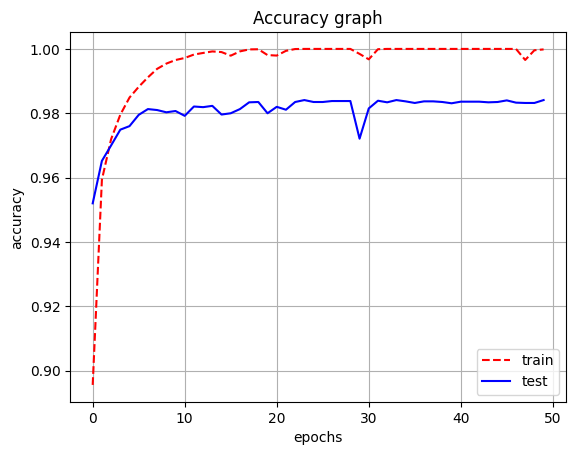

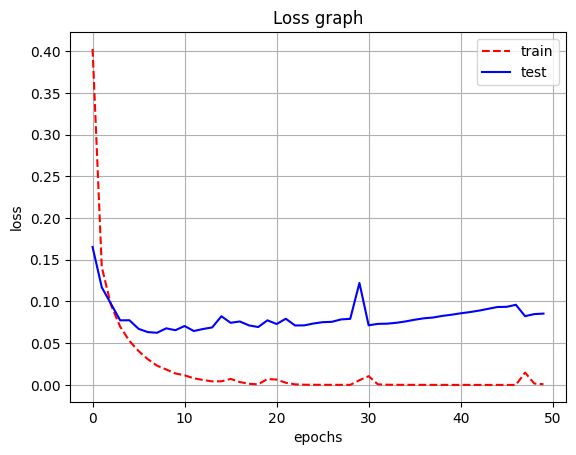

In [ ]:
# 실습5
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 심층 신경망 모델 구성
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(784,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

# 모델 컴파일
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# 모델 훈련
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

# 모델 평가
print('정확도:', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

# 모델 저장
dmlp.save('dmlp_trained.h5')

# 정확도 그래프
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], 'r--')
plt.plot(hist.history['val_accuracy'], 'b')
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

# 손실 그래프
plt.plot(hist.history['loss'], 'r--')
plt.plot(hist.history['val_loss'], 'b')
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()


170498071/170498071 [==============================] - 14s 0us/step
Epoch 1/50
391/391 - 5s - loss: 1.8221 - accuracy: 0.3496 - val_loss: 1.6964 - val_accuracy: 0.4016 - 5s/epoch - 12ms/step
Epoch 2/50
391/391 - 3s - loss: 1.6205 - accuracy: 0.4226 - val_loss: 1.6498 - val_accuracy: 0.4173 - 3s/epoch - 7ms/step
Epoch 3/50
391/391 - 2s - loss: 1.5355 - accuracy: 0.4554 - val_loss: 1.5329 - val_accuracy: 0.4553 - 2s/epoch - 4ms/step
Epoch 4/50
391/391 - 2s - loss: 1.4698 - accuracy: 0.4802 - val_loss: 1.4896 - val_accuracy: 0.4681 - 2s/epoch - 4ms/step
Epoch 5/50
391/391 - 2s - loss: 1.4212 - accuracy: 0.4974 - val_loss: 1.4219 - val_accuracy: 0.4973 - 2s/epoch - 5ms/step
Epoch 6/50
391/391 - 2s - loss: 1.3771 - accuracy: 0.5121 - val_loss: 1.4361 - val_accuracy: 0.4910 - 2s/epoch - 4ms/step
Epoch 7/50
391/391 - 2s - loss: 1.3433 - accuracy: 0.5247 - val_loss: 1.3889 - val_accuracy: 0.5092 - 2s/epoch - 4ms/step
Epoch 8/50
391/391 - 2s - loss: 1.3007 - accuracy: 0.5417 - val_loss: 1.3935 

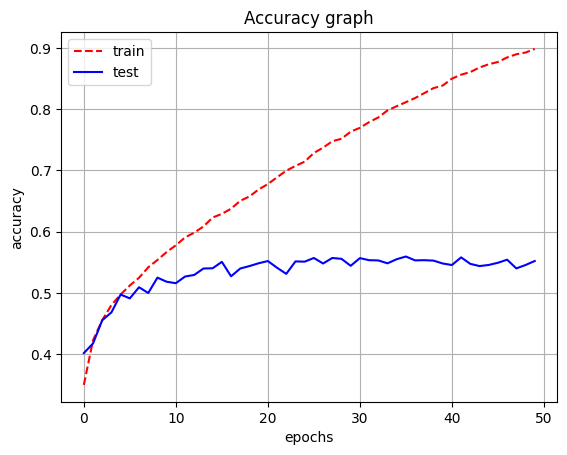

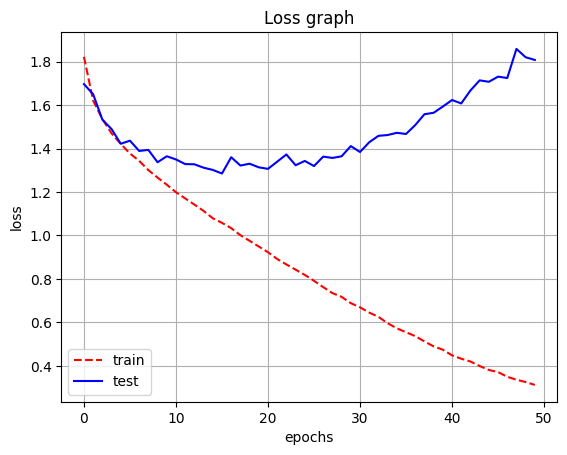

In [ ]:
# 실습6
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 심층 신경망 모델 구성
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,)))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(Dense(units=10, activation='softmax'))

# 모델 컴파일
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# 모델 훈련
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

# 모델 평가
print('정확도:', dmlp.evaluate(x_test, y_test, verbose=0)[1]*100)

# 정확도 그래프
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], 'r--')
plt.plot(hist.history['val_accuracy'], 'b')
plt.title('Accuracy graph')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

# 손실 그래프
plt.plot(hist.history['loss'], 'r--')
plt.plot(hist.history['val_loss'], 'b')
plt.title('Loss graph')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.grid()
plt.show()

Epoch 1/50
391/391 - 7s - loss: 2.7567 - accuracy: 0.2237 - val_loss: 1.9530 - val_accuracy: 0.3275 - 7s/epoch - 18ms/step
Epoch 2/50
391/391 - 2s - loss: 2.3836 - accuracy: 0.2713 - val_loss: 1.7651 - val_accuracy: 0.3761 - 2s/epoch - 6ms/step
Epoch 3/50
391/391 - 3s - loss: 2.2135 - accuracy: 0.2922 - val_loss: 1.7205 - val_accuracy: 0.3979 - 3s/epoch - 8ms/step
Epoch 4/50
391/391 - 3s - loss: 2.1000 - accuracy: 0.3096 - val_loss: 1.6895 - val_accuracy: 0.4050 - 3s/epoch - 7ms/step
Epoch 5/50
391/391 - 2s - loss: 2.0082 - accuracy: 0.3219 - val_loss: 1.6280 - val_accuracy: 0.4196 - 2s/epoch - 6ms/step
Epoch 6/50
391/391 - 2s - loss: 1.9306 - accuracy: 0.3367 - val_loss: 1.6386 - val_accuracy: 0.4040 - 2s/epoch - 6ms/step
Epoch 7/50
391/391 - 2s - loss: 1.8683 - accuracy: 0.3527 - val_loss: 1.5956 - val_accuracy: 0.4339 - 2s/epoch - 6ms/step
Epoch 8/50
391/391 - 3s - loss: 1.8235 - accuracy: 0.3608 - val_loss: 1.5945 - val_accuracy: 0.4380 - 3s/epoch - 8ms/step
Epoch 9/50
391/391 - 3s

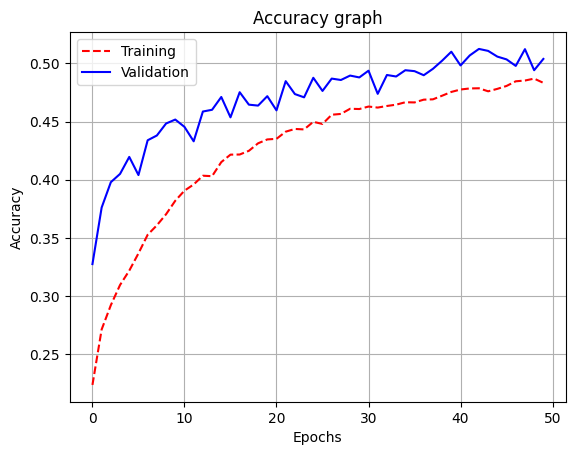

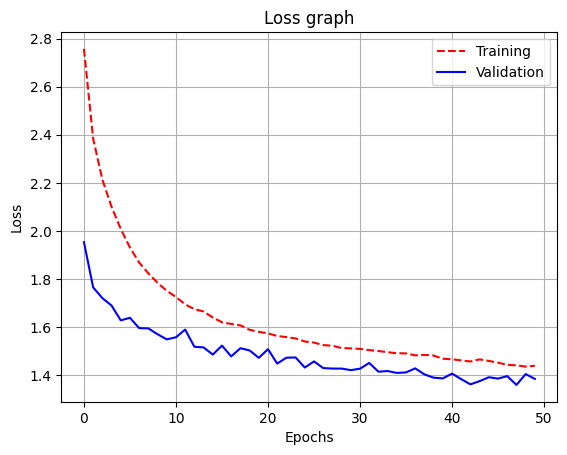

In [ ]:
# 실습6 수정코드
import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as ds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train = x_train.reshape(50000, 3072)  # 이미지를 평탄화
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype(np.float32) / 255.0  # 정규화
x_test = x_test.astype(np.float32) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)  # 원-핫 인코딩
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 심층 신경망 모델 구성
dmlp = Sequential()
dmlp.add(Dense(units=1024, activation='relu', input_shape=(3072,)))
dmlp.add(BatchNormalization())
dmlp.add(Dropout(0.5))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(BatchNormalization())
dmlp.add(Dropout(0.5))
dmlp.add(Dense(units=512, activation='relu'))
dmlp.add(BatchNormalization())
dmlp.add(Dropout(0.5))
dmlp.add(Dense(units=10, activation='softmax'))

# 모델 컴파일
dmlp.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# 모델 훈련
hist = dmlp.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), verbose=2)

# 모델 평가
accuracy = dmlp.evaluate(x_test, y_test, verbose=0)[1] * 100
print('정확도:', accuracy)

# 정확도 그래프
plt.plot(hist.history['accuracy'], 'r--')
plt.plot(hist.history['val_accuracy'], 'b')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.grid(True)
plt.show()

# 손실 그래프
plt.plot(hist.history['loss'], 'r--')
plt.plot(hist.history['val_loss'], 'b')
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.grid(True)
plt.show()



In [ ]:
# 실습7
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
#import winsound

model = tf.keras.models.load_model('dmlp_trained.h5')

def reset():
    global img
    img = np.ones((200, 520, 3), dtype=np.uint8) * 255
    for i in range(5):
        cv.rectangle(img, (10 + i * 100, 50), (10 + (i + 1) * 100, 150), (0, 0, 255), 5)
    cv.putText(img, 'e:erase s:show r:recognition q:quit', (10, 40), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1)

def grab_numerals():
    numerals = []
    for i in range(5):
        roi = img[55:145, 15 + i * 100:95 + i * 100]
        roi = 255 - cv.resize(roi, (28, 28), interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    return np.array(numerals)

def show():
    numerals = grab_numerals()
    plt.figure(figsize=(25, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(numerals[i], cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()
'''
def recognition():
    numerals = grab_numerals()
    numerals = numerals.reshape(5, 784)
    numerals = numerals.astype(np.float32) / 255.0
    res = model.predict(numerals)
    for i in range(5):
        class_id = np.argmax(res[i])
        cv.putText(img, str(class_id), (50 + i * 100, 180), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
    winsound.Beep(1000, 500)
'''
def writing(event, x, y, flags, param):
    global LColor, BrushSize
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x, y), BrushSize, LColor, -1)
    elif event == cv.EVENT_MOUSEMOVE and flags == cv.EVENT_FLAG_LBUTTON:
        cv.circle(img, (x, y), BrushSize, LColor, -1)

cv.namedWindow('Writing')
cv.setMouseCallback('Writing', writing)

while True:
    cv.imshow('Writing', img)
    key = cv.waitKey(1)
    if key == ord('e'):
        reset()
    elif key == ord('s'):
        show()
    #elif key == ord('r'):
        #recognition()
    elif key == ord('q'):
        break

cv.destroyAllWindows()


OSError: No file or directory found at dmlp_trained.h5

In [ ]:
# 실습7
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import winsound

model = tf.keras.models.load_model('dmlp_trained.h5')

def reset():
    global img
    img = np.ones((200, 520, 3), dtype=np.uint8) * 255
    for i in range(5):
        cv.rectangle(img, (10 + i * 100, 50), (10 + (i + 1) * 100, 150), (0, 0, 255), 5)
    cv.putText(img, 'e:erase s:show r:recognition q:quit', (10, 40), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1)

def grab_numerals():
    numerals = []
    for i in range(5):
        roi = img[55:145, 15 + i * 100:95 + i * 100]
        roi = 255 - cv.resize(roi, (28, 28), interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    return np.array(numerals)

def show():
    numerals = grab_numerals()
    plt.figure(figsize=(25, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(numerals[i], cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()

def recognition():
    numerals = grab_numerals()
    numerals = numerals.reshape(5, 784)
    numerals = numerals.astype(np.float32) / 255.0
    res = model.predict(numerals)
    for i in range(5):
        class_id = np.argmax(res[i])
        cv.putText(img, str(class_id), (50 + i * 100, 180), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
    winsound.Beep(1000, 500)

def writing(event, x, y, flags, param):
    global LColor, BrushSize
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x, y), BrushSize, LColor, -1)
    elif event == cv.EVENT_MOUSEMOVE and flags == cv.EVENT_FLAG_LBUTTON:
        cv.circle(img, (x, y), BrushSize, LColor, -1)

cv.namedWindow('Writing')
cv.setMouseCallback('Writing', writing)

while True:
    cv.imshow('Writing', img)
    key = cv.waitKey(1)
    if key == ord('e'):
        reset()
    elif key == ord('s'):
        show()
    elif key == ord('r'):
        recognition()
    elif key == ord('q'):
        break

cv.destroyAllWindows()


ModuleNotFoundError: No module named 'winsound'